**Objective**

This notebook studies how Tesla’s stock behaves from one day to the next using historical price and volume data. The emphasis is on feature construction that reflects returns, volatility, and trading activity, while maintaining proper time-based structure.

In [1]:
import pandas as pd

#### Data Loading

In [2]:
df = pd.read_csv('TSLA_.csv')
df.head()

,Date,open,high,low,close,adjclose,volume
0,2016-01-04,15.381333,15.425333,14.600000,14.894000,14.894000,102406500
1,2016-01-05,15.090667,15.126000,14.666667,14.895333,14.895333,47802000
2,2016-01-06,14.666667,14.670000,14.398667,14.602667,14.602667,56686500
3,2016-01-07,14.279333,14.562667,14.244667,14.376667,14.376667,53314500
4,2016-01-08,14.524000,14.696000,14.051333,14.066667,14.066667,54421500


#### Data Analysis

In [3]:
print(f"Shape of the dataframe: {df.shape}")
print(f"columns of the dataframe: {df.columns.tolist()}")

Shape of the dataframe: (2530, 7)
columns of the dataframe: ['Date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(f"Dataset loaded: {len(df)} trading days from {df.index.min().date()} to {df.index.max().date()}")

Dataset loaded: 2530 trading days from 2016-01-04 to 2026-01-26


The dataset contains 2,530 trading days/rows spanning 2016-01-04 to 2026-01-26 with 7 columns: Date, open, high, low, close, adjclose, and volume.

What the columns represent:-

* open: The price at which the stock started trading at the beginning of the day.

* high: The highest price reached by the stock during the trading day.

* low: The lowest price reached by the stock during the trading day.

* close: The price at which the stock finished trading at the end of the day.

* adjclose: The closing price adjusted for corporate actions such as stock splits or dividends, allowing fair comparison over time.

* volume: The total number of shares traded during the day, reflecting trading activity and liquidity.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2530 entries, 2016-01-04 to 2026-01-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2530 non-null   float64
 1   high      2530 non-null   float64
 2   low       2530 non-null   float64
 3   close     2530 non-null   float64
 4   adjclose  2530 non-null   float64
 5   volume    2530 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.4 KB


All 6 numerical columns have 2,530 non-null values. The 5 price fields are float64 and volume is int64, indicating no missing data.

In [6]:
df.describe()

,open,high,low,close,adjclose,volume
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03
mean,151.601583,154.918864,148.062095,151.564450,151.564450,1.152959e+08
std,132.720115,135.535159,129.612688,132.607304,132.607304,7.254980e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,2.489250e+07
25%,20.555166,20.929999,20.186500,20.583167,20.583167,7.119908e+07
50%,159.741669,163.114998,155.034996,160.290001,160.290001,9.649995e+07
75%,249.977501,254.941662,243.755001,250.217503,250.217503,1.323384e+08
max,489.880005,498.829987,485.329987,489.880005,489.880005,9.140820e+08


* open: Broad dispersion (9.49–489.88) with mean 151, indicating values are spread across multiple price regimes rather than concentrated around a single level.

* high: Upper price bound reaches 498; mean (155) is consistent with other price measures, reflecting similar scaling across daily highs.

* low: Wide range (9.40–485.33) with mean 148, close to open/close means, indicating no structural separation among price components.

* close: Range spans nearly the full observed price domain (9.58–489.88) with mean 151, confirming high overall variability.

* adjclose: Nearly identical range and mean to close, indicating adjustments do not materially change price distribution.

* volume: Extremely wide range (24.9M–914M) with mean 115M, indicating highly heterogeneous trading activity across days.

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

skewness = df.skew()
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

analysis = pd.DataFrame({
    'skewness': skewness,
    'outliers': outliers
})
pd.set_option('display.float_format', '{:.2f}'.format)
analysis

,skewness,outliers
open,0.46,0
high,0.46,0
low,0.47,0
close,0.46,0
adjclose,0.46,0
volume,2.93,180


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

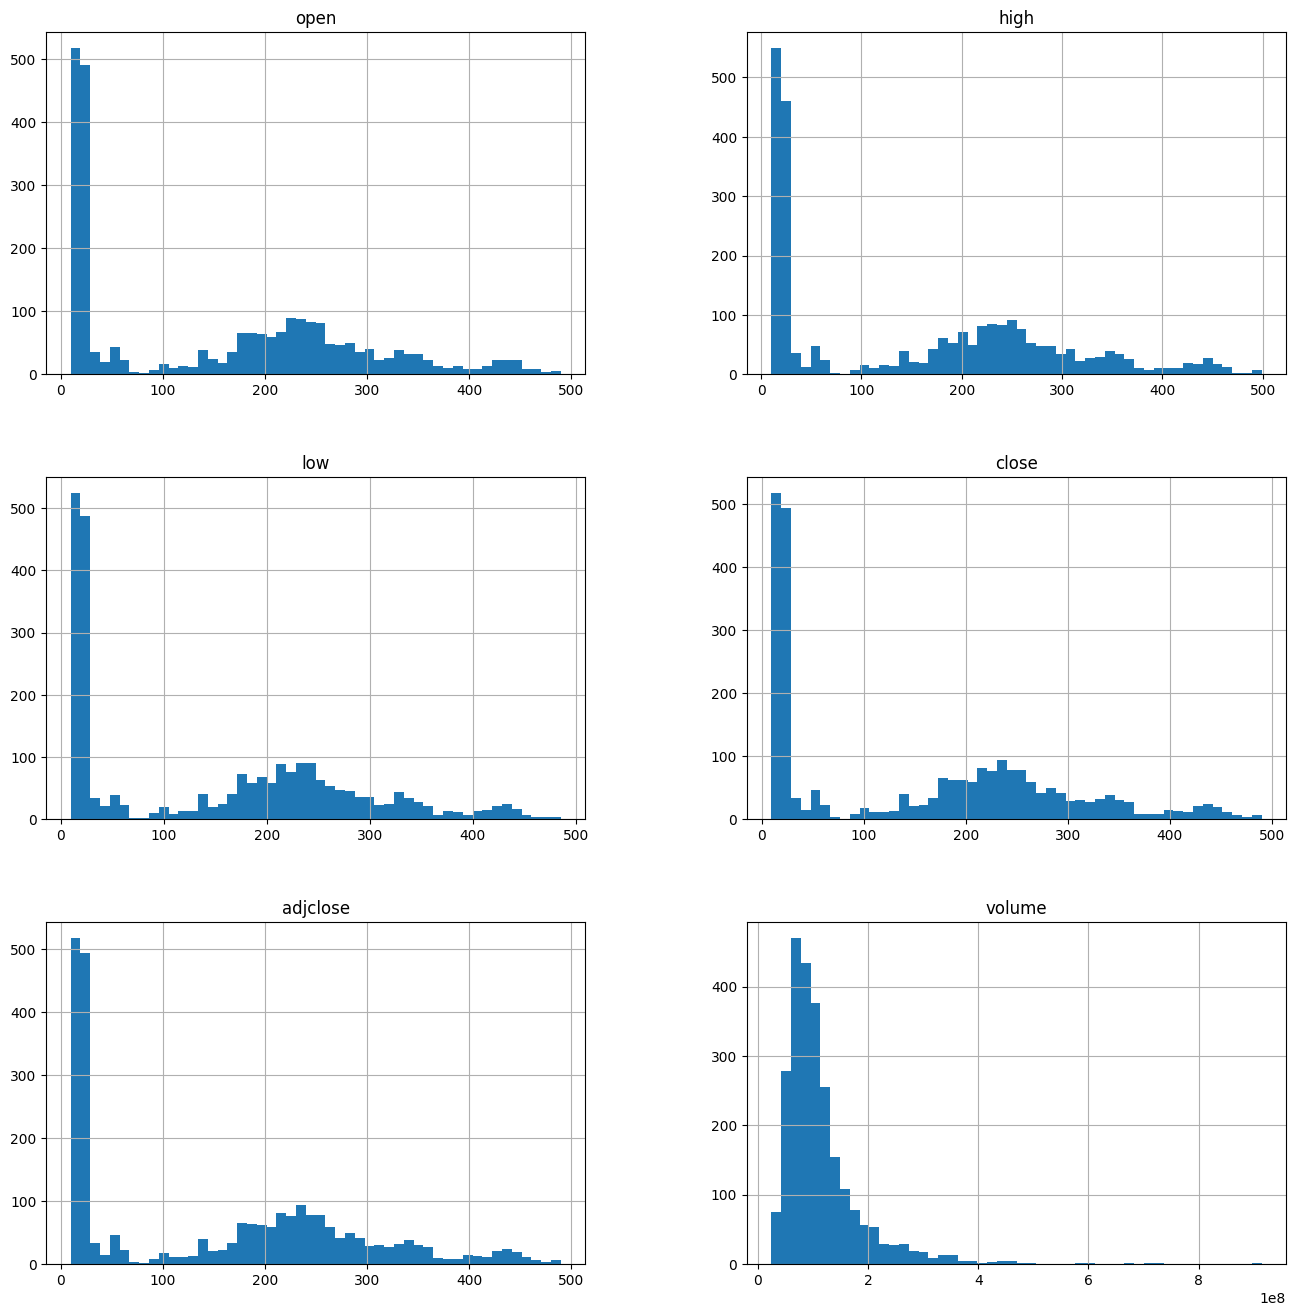

In [9]:
df.hist( bins = 50 , figsize = (16,16))
plt.show()

All price variables (open, high, low, close, adjclose) show similar, uneven distributions with most observations concentrated in certain ranges and long tails, indicating prices are not evenly distributed across levels.

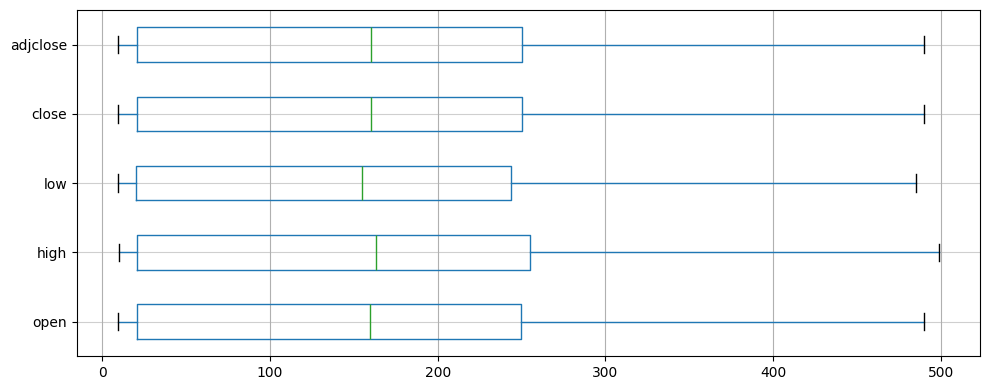

In [10]:
plt.figure(figsize=(10,4))
df[["open","high","low","close","adjclose"]].boxplot(vert=False)
plt.xticks()
plt.grid(axis="y", alpha=0.6)
plt.tight_layout()
plt.show()

The medians of open, high, low, close, and adjclose are close to each other, and their interquartile ranges largely overlap, showing consistent scaling and behavior across different price measures.

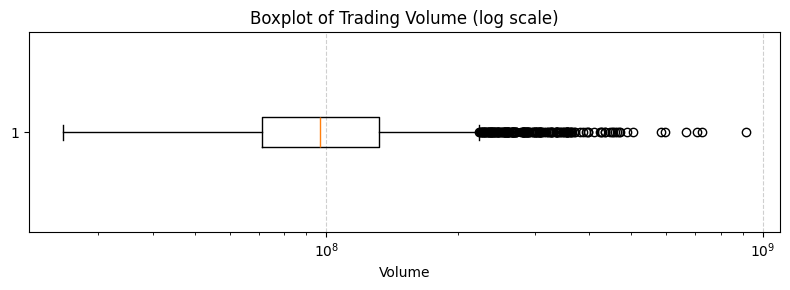

In [11]:
plt.figure(figsize=(8, 3))

plt.boxplot(
    df["volume"],
    vert=False,
    showfliers=True
)

plt.xscale("log")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)

plt.title("Boxplot of Trading Volume (log scale)")
plt.xlabel("Volume")

plt.tight_layout()
plt.show()


Trading volume is strongly right-skewed, with most days clustered around a typical range and many extreme high-volume outliers, indicating occasional spikes rather than consistently high trading activity.

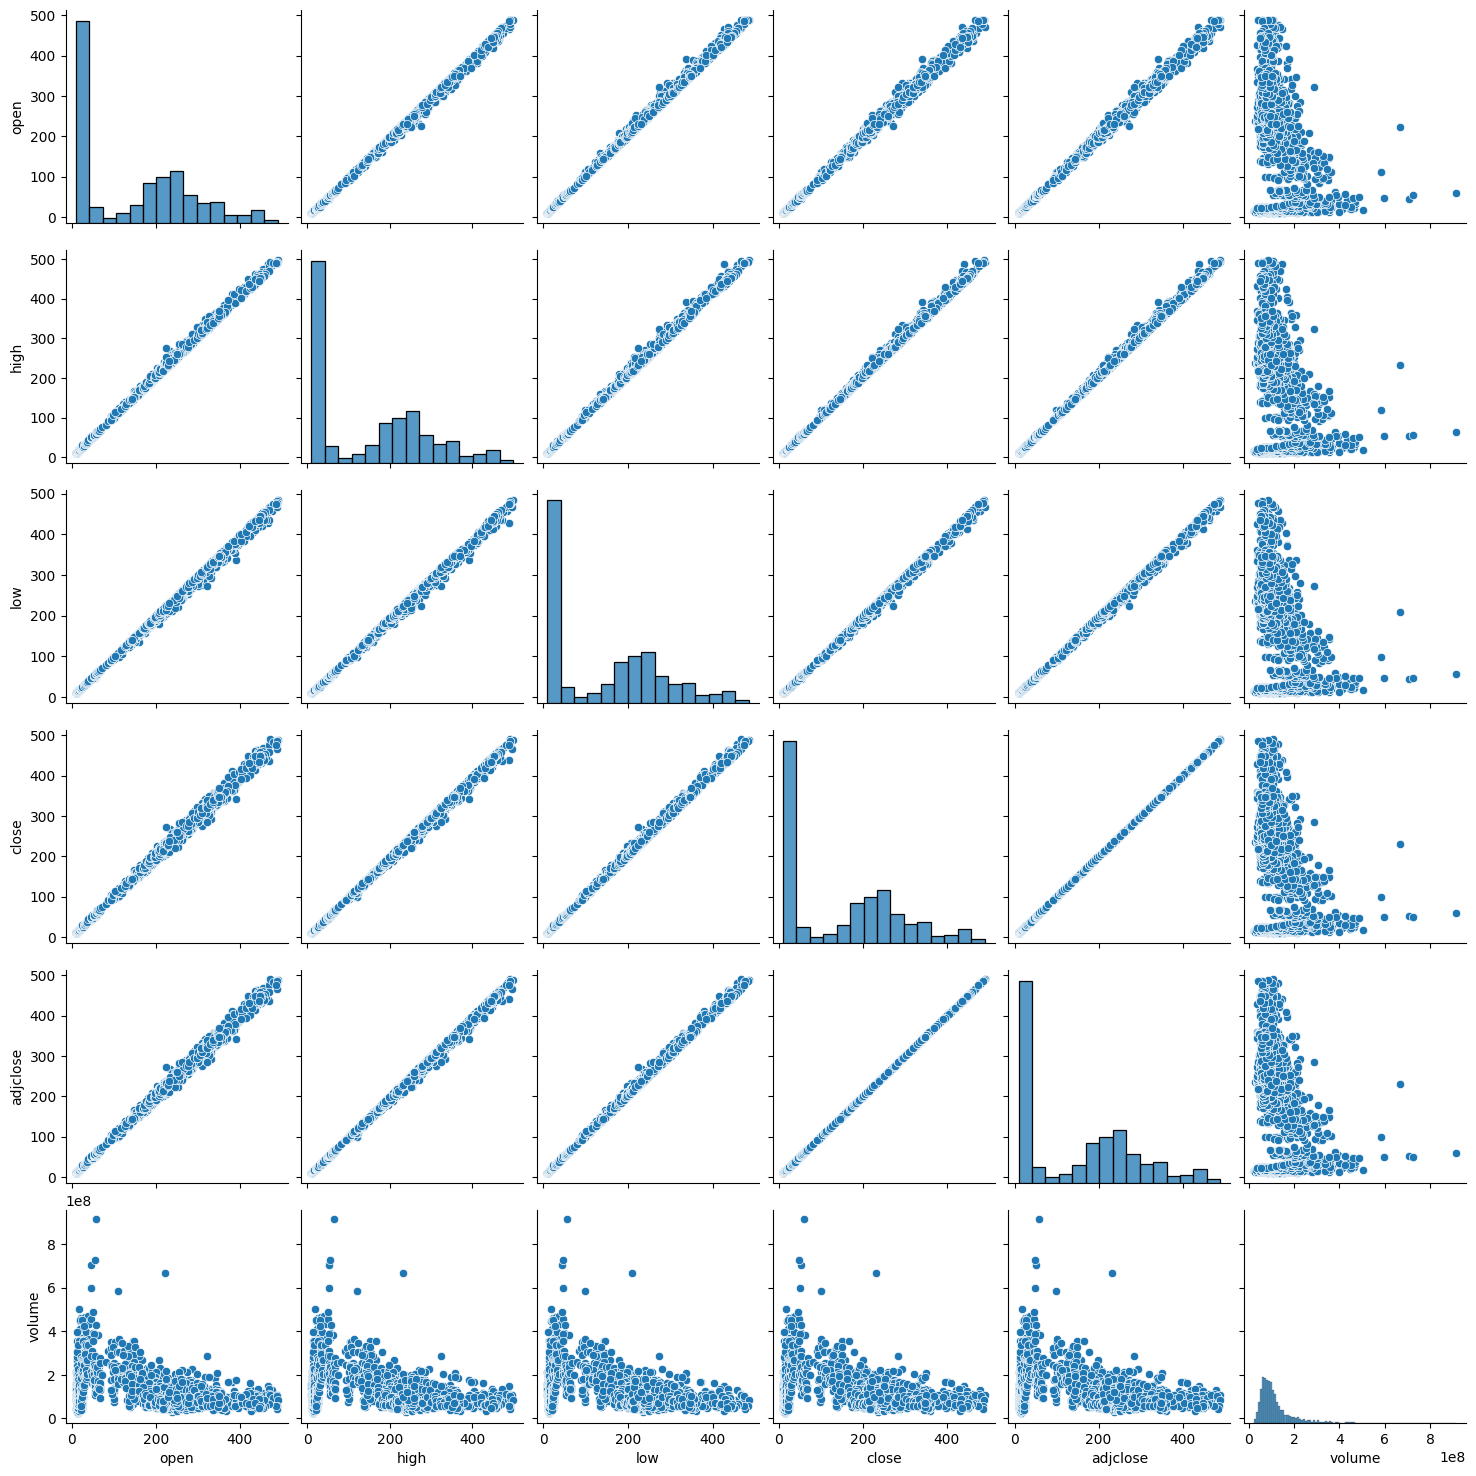

In [12]:
sns.pairplot(df)
plt.show()

Since open, high, low, close, and adjclose are almost perfectly linearly related, they provide largely redundant information for predicting the next day’s close. Therefore, additional features are needed to capture temporal dynamics rather than raw price levels.

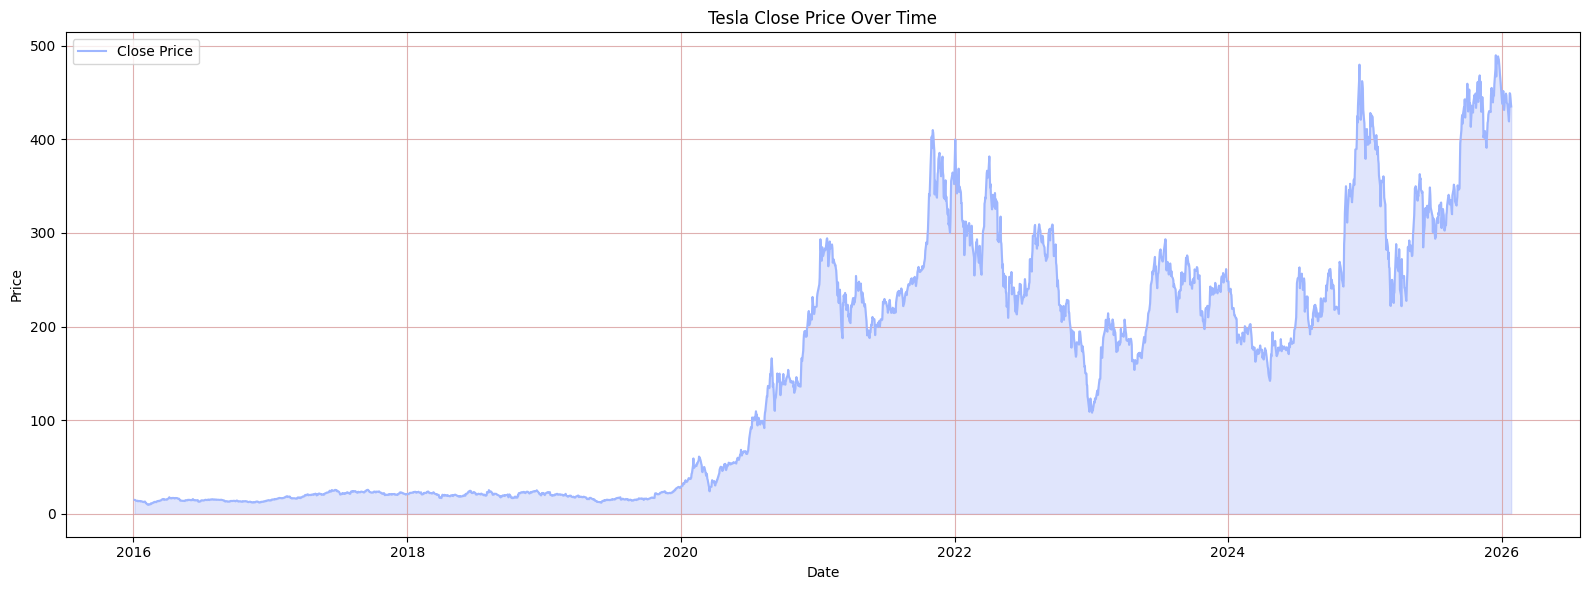

In [13]:
# Simple price chart
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df.index, df['close'], color="#9EB6FF", label='Close Price')
ax.fill_between(df.index, df['close'], alpha=0.3, color="#9aa9f6")
ax.set_title('Tesla Close Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True, alpha=0.8, color = "#D89D9D")
plt.tight_layout()
plt.show()

The close price shows a strong trend with large fluctuations, indicating non-stationary behavior and changing regimes over time, which is important for next-day prediction.

#### Feature Engineering

In [14]:
import numpy as np

In [15]:
# Feautre 1: Daily Returns
df['Daily_Return'] = df['adjclose'].pct_change()

In [16]:
df.head()

,open,high,low,close,adjclose,volume,Daily_Return
Date,,,,,,,
2016-01-04,15.38,15.43,14.60,14.89,14.89,102406500,NaN
2016-01-05,15.09,15.13,14.67,14.90,14.90,47802000,0.00
2016-01-06,14.67,14.67,14.40,14.60,14.60,56686500,-0.02
2016-01-07,14.28,14.56,14.24,14.38,14.38,53314500,-0.02
2016-01-08,14.52,14.70,14.05,14.07,14.07,54421500,-0.02


In [17]:
# Analysis with the new feature "Daily Returns"
r = df["Daily_Return"].dropna()
start, end = df["close"].iloc[0], df["close"].iloc[-1]
years = len(df) / 252

print(f"Total Return: {(end/start - 1)*100:.2f}%")
print(f"Avg Daily Return: {r.mean()*100:.3f}%")
print(f"Daily Volatility: {r.std()*100:.3f}%")
print(f"Annual Volatility: {r.std()*np.sqrt(252)*100:.2f}%")
print(f"Sharpe: {(r.mean()/r.std())*np.sqrt(252):.2f}")
print(f"Compound Annual Growth Rate: {((end/start)**(1/years) - 1)*100:.2f}%")


Total Return: 2821.98%
Avg Daily Return: 0.203%
Daily Volatility: 3.727%
Annual Volatility: 59.17%
Sharpe: 0.86
Compound Annual Growth Rate: 39.96%


* Total Return: 2821.98%

Over the full sample period, the asset increased by approximately 28× its initial value. This reflects strong long-term growth across the dataset.

* Average Daily Return: 0.203%

On an average trading day, the asset gained about 0.20%. While small on a daily basis, this return compounds significantly over long horizons and is consistent with the high total return observed.

* Daily Volatility: 3.727%

Daily returns fluctuate by roughly ±3.7% around their mean. This indicates substantial day-to-day variability, meaning returns are far from stable and can change significantly from one day to the next.

* Annualized Volatility: 59.17%

When scaled to a yearly level, volatility is very high at nearly 60%, indicating large swings in returns over the year. This places the asset in a high-risk category, despite its strong returns.

* Sharpe Ratio: 0.86

The Sharpe ratio measures return per unit of risk. A value of 0.86 suggests that returns are positive but risk-adjusted performance is moderate. Much of the return comes with significant volatility rather than consistent gains.

* Compound Annual Growth Rate (CAGR): 39.96%

The CAGR represents the smoothed annual growth rate over the entire period. A value close to 40% per year indicates exceptionally strong long-term compounding, assuming growth were evenly distributed across years.

<Axes: xlabel='Daily_Return', ylabel='Count'>

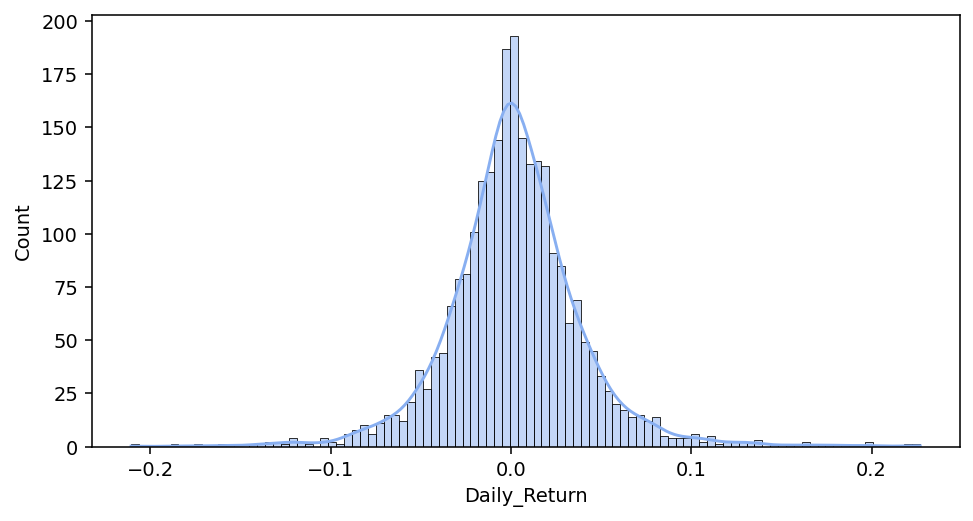

In [18]:
plt.figure(figsize=(8,4), dpi=140)
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, color="#88AFF1")

The daily returns are centered near zero with a roughly bell-shaped distribution and heavy tails, indicating occasional extreme price movements.

In [19]:
# Volatility (rolling)
df["Vol_10"] = df["Daily_Return"].rolling(10).std()
df["Vol_20"] = df["Daily_Return"].rolling(20).std()

# Volume change
df["Volume_Change"] = df["volume"].pct_change()

df.head()

,open,high,low,close,adjclose,volume,Daily_Return,Vol_10,Vol_20,Volume_Change
Date,,,,,,,,,,
2016-01-04,15.38,15.43,14.60,14.89,14.89,102406500,NaN,NaN,NaN,NaN
2016-01-05,15.09,15.13,14.67,14.90,14.90,47802000,0.00,NaN,NaN,-0.53
2016-01-06,14.67,14.67,14.40,14.60,14.60,56686500,-0.02,NaN,NaN,0.19
2016-01-07,14.28,14.56,14.24,14.38,14.38,53314500,-0.02,NaN,NaN,-0.06
2016-01-08,14.52,14.70,14.05,14.07,14.07,54421500,-0.02,NaN,NaN,0.02


* Vol_10 and Vol_20

Rolling volatility measures how unstable or calm the market has been over recent windows. Vol_10 reflects short-term risk, while Vol_20 captures a slightly longer regime. These features tell the model whether the market is currently in a high-uncertainty or low-uncertainty state, which directly affects how predictable the next day’s move may be.

* Volume_Change

Volume change captures shifts in trading activity, not just how much is traded. Sudden increases or decreases in volume often signal changes in market participation, interest, or information flow. This feature provides context to price movements, helping distinguish routine price changes from moves accompanied by unusual market activity.

In [20]:
matrix = df.corr()

In [21]:
matrix

,open,high,low,close,adjclose,volume,Daily_Return,Vol_10,Vol_20,Volume_Change
open,1.00,1.00,1.00,1.00,1.00,-0.19,-0.01,0.15,0.17,-0.06
high,1.00,1.00,1.00,1.00,1.00,-0.18,0.00,0.16,0.17,-0.05
low,1.00,1.00,1.00,1.00,1.00,-0.19,0.00,0.14,0.16,-0.06
close,1.00,1.00,1.00,1.00,1.00,-0.19,0.02,0.15,0.17,-0.06
adjclose,1.00,1.00,1.00,1.00,1.00,-0.19,0.02,0.15,0.17,-0.06
volume,-0.19,-0.18,-0.19,-0.19,-0.19,1.00,0.10,0.47,0.45,0.36
Daily_Return,-0.01,0.00,0.00,0.02,0.02,0.10,1.00,0.06,0.05,0.04
Vol_10,0.15,0.16,0.14,0.15,0.15,0.47,0.06,1.00,0.85,-0.00
Vol_20,0.17,0.17,0.16,0.17,0.17,0.45,0.05,0.85,1.00,-0.02
Volume_Change,-0.06,-0.05,-0.06,-0.06,-0.06,0.36,0.04,-0.00,-0.02,1.00
